<a href="https://colab.research.google.com/github/orcuncakaar/orcuncakaar/blob/main/3_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [40]:
df = pd.read_csv('housing.csv')

In [41]:
print("Veri seti hakkında temel bilgiler:")
print(f"Veri seti boyutu: {df.shape}")
print(f"Eksik değerler:\n{df.isnull().sum()}")
print(f"\nİlk 5 satır:\n{df.head()}")

Veri seti hakkında temel bilgiler:
Veri seti boyutu: (20640, 10)
Eksik değerler:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

İlk 5 satır:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138

In [42]:
numeric_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income',
                'median_house_value']

In [43]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [44]:
def analyze_distribution(data, column_name):
    print(f"\n{column_name} için dağılım analizi:")
    print(f"Çarpıklık (Skewness): {stats.skew(data):.4f}")
    print(f"Basıklık (Kurtosis): {stats.kurtosis(data):.4f}")
    print(f"Shapiro-Wilk normallik testi p-değeri: {stats.shapiro(data[:5000])[1]:.6f}")
    p_value = stats.jarque_bera(data).pvalue
    print(f"Jarque-Bera normallik testi p-değeri: {p_value:.6f}")

In [45]:
for col in numeric_cols:
    analyze_distribution(df[col], col)


longitude için dağılım analizi:
Çarpıklık (Skewness): -0.2978
Basıklık (Kurtosis): -1.3301
Shapiro-Wilk normallik testi p-değeri: 0.000000
Jarque-Bera normallik testi p-değeri: 0.000000

latitude için dağılım analizi:
Çarpıklık (Skewness): 0.4659
Basıklık (Kurtosis): -1.1178
Shapiro-Wilk normallik testi p-değeri: 0.000000
Jarque-Bera normallik testi p-değeri: 0.000000

housing_median_age için dağılım analizi:
Çarpıklık (Skewness): 0.0603
Basıklık (Kurtosis): -0.8007
Shapiro-Wilk normallik testi p-değeri: 0.000000
Jarque-Bera normallik testi p-değeri: 0.000000

total_rooms için dağılım analizi:
Çarpıklık (Skewness): 4.1470
Basıklık (Kurtosis): 32.6227
Shapiro-Wilk normallik testi p-değeri: 0.000000
Jarque-Bera normallik testi p-değeri: 0.000000

total_bedrooms için dağılım analizi:
Çarpıklık (Skewness): 3.4809
Basıklık (Kurtosis): 22.2371
Shapiro-Wilk normallik testi p-değeri: 0.000000
Jarque-Bera normallik testi p-değeri: 0.000000

population için dağılım analizi:
Çarpıklık (Skewness)

In [46]:
def apply_boxcox_transformation(data, column_name):
    try:
        if (data <= 0).any():
            print(f"\n{column_name} için Box-Cox uygulanamaz (negatif/sıfır değer var)")
            return None, None

        # Box-Cox transformasyonu
        transformed_data, lambda_param = boxcox(data)

        print(f"\n{column_name} Box-Cox transformasyonu:")
        print(f"Lambda parametresi: {lambda_param:.4f}")
        print(f"Transformasyon öncesi çarpıklık: {stats.skew(data):.4f}")
        print(f"Transformasyon sonrası çarpıklık: {stats.skew(transformed_data):.4f}")

        return transformed_data, lambda_param

    except Exception as e:
        print(f"\n{column_name} için Box-Cox hatası: {e}")
        return None, None

print("\n" + "=" * 60)
print("BOX-COX TRANSFORMASYONU")
print("=" * 60)


BOX-COX TRANSFORMASYONU


In [47]:
df_boxcox = df.copy()
boxcox_params = {}

for col in numeric_cols:
    transformed, lambda_param = apply_boxcox_transformation(df[col], col)
    if transformed is not None:
        df_boxcox[f'{col}_boxcox'] = transformed
        boxcox_params[col] = lambda_param


longitude için Box-Cox uygulanamaz (negatif/sıfır değer var)

latitude Box-Cox transformasyonu:
Lambda parametresi: -5.2157
Transformasyon öncesi çarpıklık: 0.4659
Transformasyon sonrası çarpıklık: 0.1533

housing_median_age Box-Cox transformasyonu:
Lambda parametresi: 0.8094
Transformasyon öncesi çarpıklık: 0.0603
Transformasyon sonrası çarpıklık: -0.1216

total_rooms Box-Cox transformasyonu:
Lambda parametresi: 0.2208
Transformasyon öncesi çarpıklık: 4.1470
Transformasyon sonrası çarpıklık: 0.1233

total_bedrooms Box-Cox transformasyonu:
Lambda parametresi: 0.2247
Transformasyon öncesi çarpıklık: 3.4809
Transformasyon sonrası çarpıklık: 0.1149

population Box-Cox transformasyonu:
Lambda parametresi: 0.2358
Transformasyon öncesi çarpıklık: 4.9355
Transformasyon sonrası çarpıklık: 0.1131

households Box-Cox transformasyonu:
Lambda parametresi: 0.2449
Transformasyon öncesi çarpıklık: 3.4102
Transformasyon sonrası çarpıklık: 0.1159

median_income Box-Cox transformasyonu:
Lambda parametr

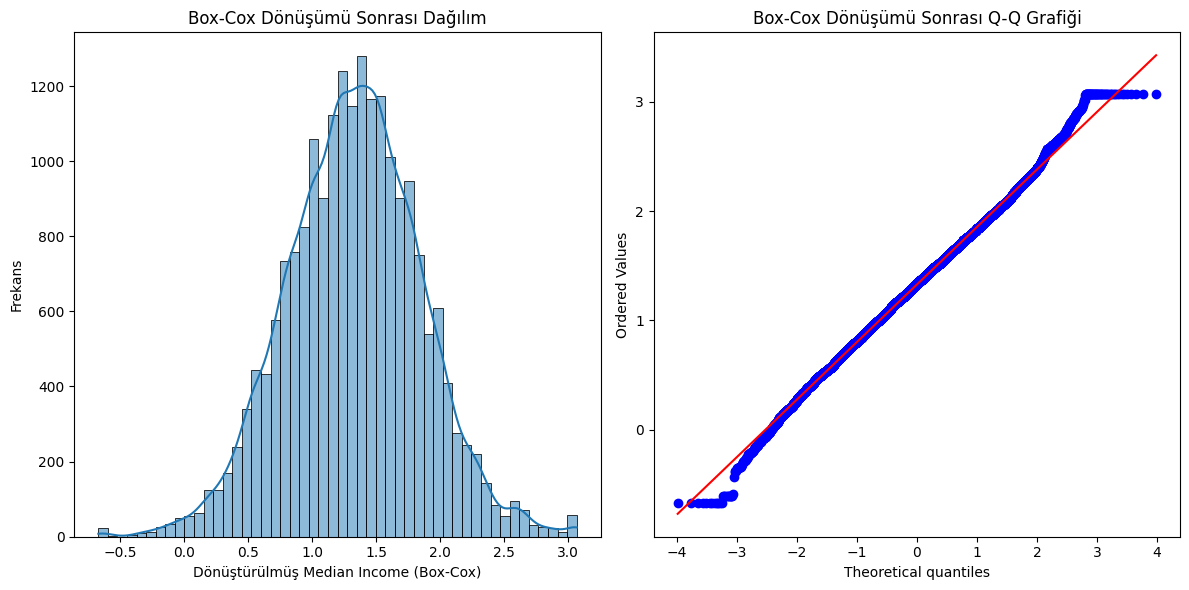

In [54]:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data_boxcox, kde=True, bins=50)
    plt.title('Box-Cox Dönüşümü Sonrası Dağılım')
    plt.xlabel('Dönüştürülmüş Median Income (Box-Cox)')
    plt.ylabel('Frekans')
    plt.subplot(1, 2, 2)
    stats.probplot(data_boxcox, dist="norm", plot=plt)
    plt.title('Box-Cox Dönüşümü Sonrası Q-Q Grafiği')
    plt.tight_layout()
    plt.show()

In [48]:
def apply_yeojohnson_transformation(data, column_name):
    try:
        # Yeo-Johnson transformasyonu
        transformed_data, lambda_param = yeojohnson(data)

        print(f"\n{column_name} Yeo-Johnson transformasyonu:")
        print(f"Lambda parametresi: {lambda_param:.4f}")
        print(f"Transformasyon öncesi çarpıklık: {stats.skew(data):.4f}")
        print(f"Transformasyon sonrası çarpıklık: {stats.skew(transformed_data):.4f}")

        return transformed_data, lambda_param

    except Exception as e:
        print(f"\n{column_name} için Yeo-Johnson hatası: {e}")
        return None, None

print("\n" + "=" * 60)
print("YEO-JOHNSON TRANSFORMASYONU")
print("=" * 60)

df_yeojohnson = df.copy()
yeojohnson_params = {}

for col in numeric_cols:
    transformed, lambda_param = apply_yeojohnson_transformation(df[col], col)
    if transformed is not None:
        df_yeojohnson[f'{col}_yeojohnson'] = transformed
        yeojohnson_params[col] = lambda_param


YEO-JOHNSON TRANSFORMASYONU

longitude Yeo-Johnson transformasyonu:
Lambda parametresi: 8.3066
Transformasyon öncesi çarpıklık: -0.2978
Transformasyon sonrası çarpıklık: -0.1945

latitude Yeo-Johnson transformasyonu:
Lambda parametresi: -5.3784
Transformasyon öncesi çarpıklık: 0.4659
Transformasyon sonrası çarpıklık: 0.1538

housing_median_age Yeo-Johnson transformasyonu:
Lambda parametresi: 0.8081
Transformasyon öncesi çarpıklık: 0.0603
Transformasyon sonrası çarpıklık: -0.1131

total_rooms Yeo-Johnson transformasyonu:
Lambda parametresi: 0.2193
Transformasyon öncesi çarpıklık: 4.1470
Transformasyon sonrası çarpıklık: 0.1214

total_bedrooms Yeo-Johnson transformasyonu:
Lambda parametresi: 0.2183
Transformasyon öncesi çarpıklık: 3.4809
Transformasyon sonrası çarpıklık: 0.1079

population Yeo-Johnson transformasyonu:
Lambda parametresi: 0.2335
Transformasyon öncesi çarpıklık: 4.9355
Transformasyon sonrası çarpıklık: 0.1106

households Yeo-Johnson transformasyonu:
Lambda parametresi: 0.

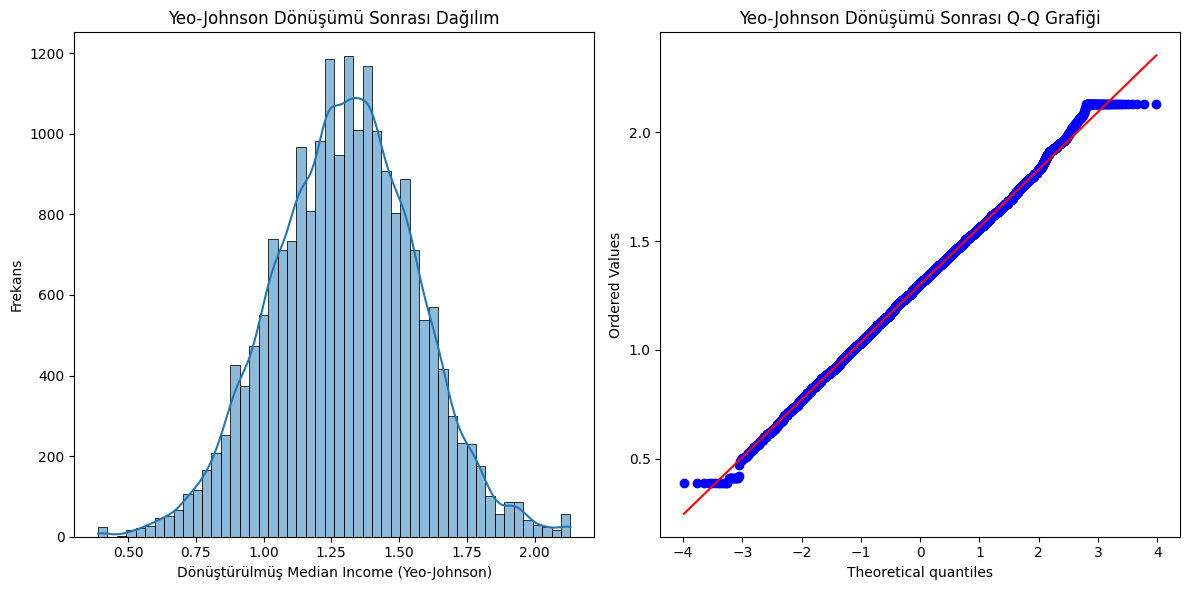

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_yeojohnson, kde=True, bins=50)
plt.title('Yeo-Johnson Dönüşümü Sonrası Dağılım')
plt.xlabel('Dönüştürülmüş Median Income (Yeo-Johnson)')
plt.ylabel('Frekans')
plt.subplot(1, 2, 2)
stats.probplot(data_yeojohnson, dist="norm", plot=plt)
plt.title('Yeo-Johnson Dönüşümü Sonrası Q-Q Grafiği')
plt.tight_layout()
plt.show()

In [49]:
def compare_transformations(original_data, transformed_data, column_name, method_name):
    """Transformasyon öncesi ve sonrası karşılaştırma"""
    print(f"\n{column_name} - {method_name} Karşılaştırması:")
    print(f"Orijinal çarpıklık: {stats.skew(original_data):.4f}")
    print(f"Transformasyon sonrası çarpıklık: {stats.skew(transformed_data):.4f}")
    print(f"Çarpıklık iyileşmesi: {abs(stats.skew(original_data)) - abs(stats.skew(transformed_data)):.4f}")

print("\n" + "=" * 60)
print("TRANSFORMASYON SONUÇLARININ KARŞILAŞTIRILMASI")
print("=" * 60)

# Sonuçları karşılaştırma
for col in numeric_cols:
    print(f"\n{col.upper()} SÜTUNU İÇİN SONUÇLAR:")
    print("-" * 40)

    # Orijinal veri istatistikleri
    orig_skew = stats.skew(df[col])
    print(f"Orijinal çarpıklık: {orig_skew:.4f}")

    # Box-Cox sonuçları
    if col in boxcox_params:
        boxcox_skew = stats.skew(df_boxcox[f'{col}_boxcox'])
        print(f"Box-Cox çarpıklık: {boxcox_skew:.4f} (iyileşme: {abs(orig_skew) - abs(boxcox_skew):.4f})")

    # Yeo-Johnson sonuçları
    if col in yeojohnson_params:
        yj_skew = stats.skew(df_yeojohnson[f'{col}_yeojohnson'])
        print(f"Yeo-Johnson çarpıklık: {yj_skew:.4f} (iyileşme: {abs(orig_skew) - abs(yj_skew):.4f})")


TRANSFORMASYON SONUÇLARININ KARŞILAŞTIRILMASI

LONGITUDE SÜTUNU İÇİN SONUÇLAR:
----------------------------------------
Orijinal çarpıklık: -0.2978
Yeo-Johnson çarpıklık: -0.1945 (iyileşme: 0.1033)

LATITUDE SÜTUNU İÇİN SONUÇLAR:
----------------------------------------
Orijinal çarpıklık: 0.4659
Box-Cox çarpıklık: 0.1533 (iyileşme: 0.3126)
Yeo-Johnson çarpıklık: 0.1538 (iyileşme: 0.3121)

HOUSING_MEDIAN_AGE SÜTUNU İÇİN SONUÇLAR:
----------------------------------------
Orijinal çarpıklık: 0.0603
Box-Cox çarpıklık: -0.1216 (iyileşme: -0.0612)
Yeo-Johnson çarpıklık: -0.1131 (iyileşme: -0.0528)

TOTAL_ROOMS SÜTUNU İÇİN SONUÇLAR:
----------------------------------------
Orijinal çarpıklık: 4.1470
Box-Cox çarpıklık: 0.1233 (iyileşme: 4.0238)
Yeo-Johnson çarpıklık: 0.1214 (iyileşme: 4.0257)

TOTAL_BEDROOMS SÜTUNU İÇİN SONUÇLAR:
----------------------------------------
Orijinal çarpıklık: 3.4809
Box-Cox çarpıklık: 0.1149 (iyileşme: 3.3660)
Yeo-Johnson çarpıklık: 0.1079 (iyileşme: 3.3729)

P